In [1]:
# install.packages('rlang')
# install.packages("caret")
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("tidyr")

In [2]:
# Load the necessary libraries
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# Read the dataset
Bank_exit<- read.csv("Bank_exit_dataset.csv")

**DATA UNDERSTANDING**

In [42]:
# Display the first few rows of the dataset
head(Bank_exit)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,619,1,1,42,2,0.00,1,1,1,101348.88,1
2,608,3,1,41,1,83807.86,1,0,1,112542.58,0
3,502,1,1,42,8,159660.80,3,1,0,113931.57,1
4,699,1,1,39,1,0.00,2,0,0,93826.63,0
5,850,3,1,43,2,125510.82,1,1,1,79084.10,0
6,645,3,2,44,8,113755.78,2,1,0,149756.71,1


In [5]:
tail(Bank_exit)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
9995,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
str(Bank_exit)

'data.frame':	10000 obs. of  14 variables:
 $ RowNumber      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CustomerId     : int  15634602 15647311 15619304 15701354 15737888 15574012 15592531 15656148 15792365 15592389 ...
 $ Surname        : chr  "Hargrave" "Hill" "Onio" "Boni" ...
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ Geography      : chr  "France" "Spain" "France" "France" ...
 $ Gender         : chr  "Female" "Female" "Female" "Female" ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ Balance        : num  0 83808 159661 0 125511 ...
 $ NumOfProducts  : int  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCrCard      : int  1 0 1 0 1 1 1 1 0 1 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


In [7]:
summary(Bank_exit)

   RowNumber       CustomerId         Surname           CreditScore   
 Min.   :    1   Min.   :15565701   Length:10000       Min.   :350.0  
 1st Qu.: 2501   1st Qu.:15628528   Class :character   1st Qu.:584.0  
 Median : 5000   Median :15690738   Mode  :character   Median :652.0  
 Mean   : 5000   Mean   :15690941                      Mean   :650.5  
 3rd Qu.: 7500   3rd Qu.:15753234                      3rd Qu.:718.0  
 Max.   :10000   Max.   :15815690                      Max.   :850.0  
  Geography            Gender               Age            Tenure      
 Length:10000       Length:10000       Min.   :18.00   Min.   : 0.000  
 Class :character   Class :character   1st Qu.:32.00   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Median :37.00   Median : 5.000  
                                       Mean   :38.92   Mean   : 5.013  
                                       3rd Qu.:44.00   3rd Qu.: 7.000  
                                       Max.   :92.00   Max.   :10.000  

In [8]:
nrow(Bank_exit)

[1] 10000

In [9]:
ncol(Bank_exit)

[1] 14

In [10]:
names(Bank_exit)

[1] "RowNumber"       "CustomerId"      "Surname"         "CreditScore"    
 [5] "Geography"       "Gender"          "Age"             "Tenure"         
 [9] "Balance"         "NumOfProducts"   "HasCrCard"       "IsActiveMember" 
[13] "EstimatedSalary" "Exited"

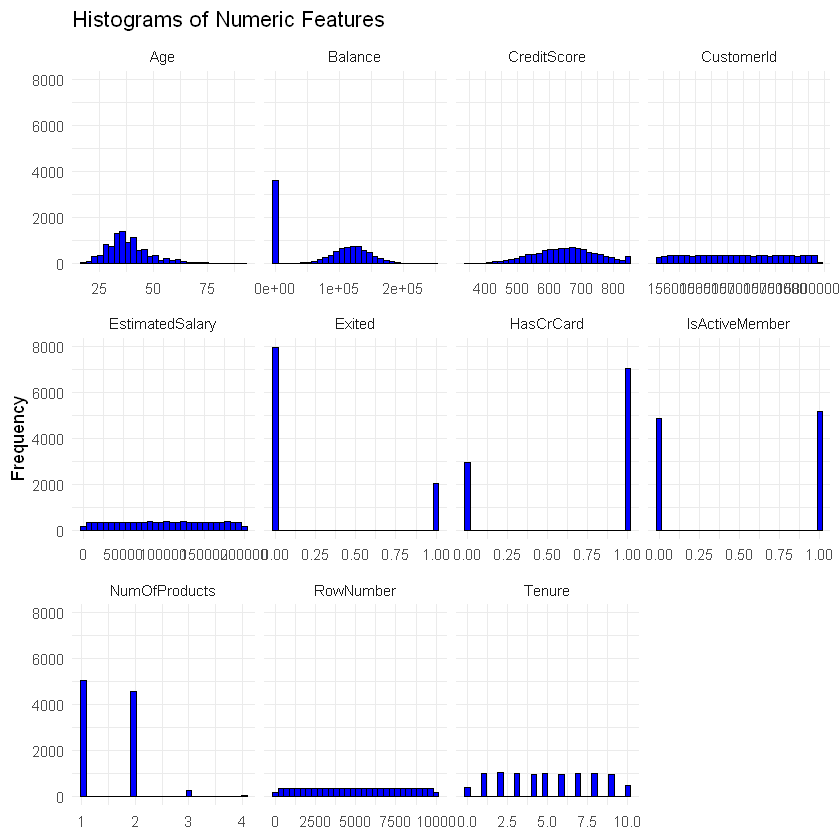

In [11]:
library(tidyr)
# Create histograms for each numeric feature
Bank_exit %>%
  select(where(is.numeric)) %>%
  gather() %>%
  ggplot(aes(value)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  facet_wrap(~key, scales = "free_x") +
  theme_minimal() +
  labs(title = "Histograms of Numeric Features", x = NULL, y = "Frequency")

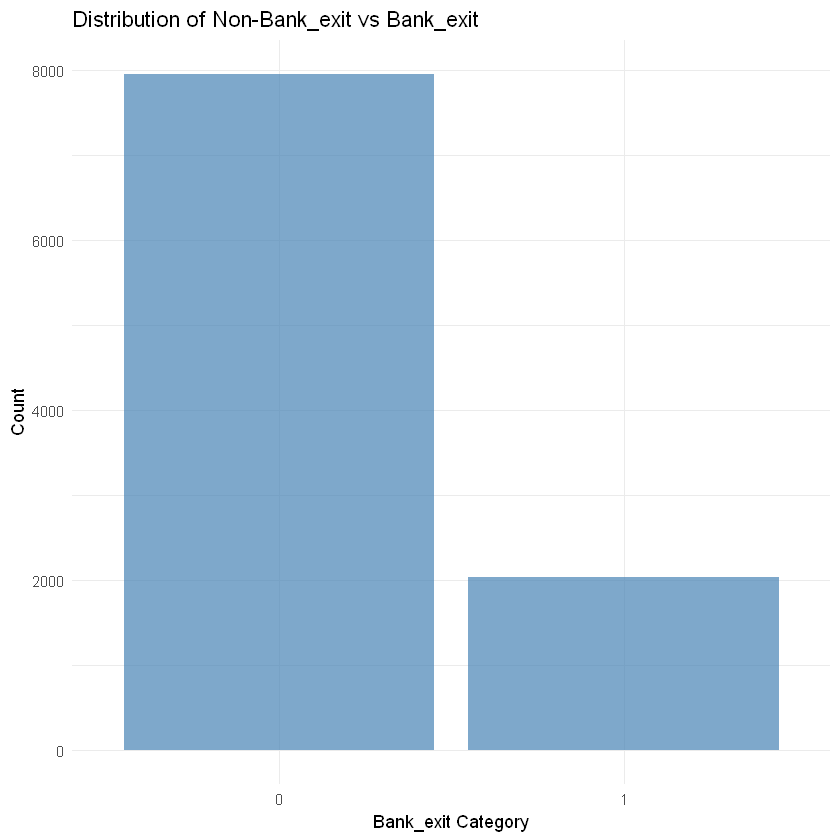

In [12]:
# Plotting the distribution of the target variable 'phishing'
ggplot(Bank_exit, aes(x = factor(Exited))) +
  geom_bar(fill = "steelblue", alpha = 0.7) +
  labs(x = "Bank_exit Category", y = "Count", title = "Distribution of Non-Bank_exit vs Bank_exit") +
  theme_minimal()

In [13]:
# Encoding using 'factor' function
Bank_exit$Geography <- as.numeric(factor(Bank_exit$Geography))
Bank_exit$Gender <- as.numeric(factor(Bank_exit$Gender))


In [14]:
Bank_exit$Surname <- as.factor(Bank_exit$Surname)

In [15]:
head(Bank_exit)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
2,2,15647311,Hill,608,3,1,41,1,83807.86,1,0,1,112542.58,0
3,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
4,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
5,5,15737888,Mitchell,850,3,1,43,2,125510.82,1,1,1,79084.10,0
6,6,15574012,Chu,645,3,2,44,8,113755.78,2,1,0,149756.71,1


In [16]:
sum(colSums(is.na(Bank_exit)))

[1] 0

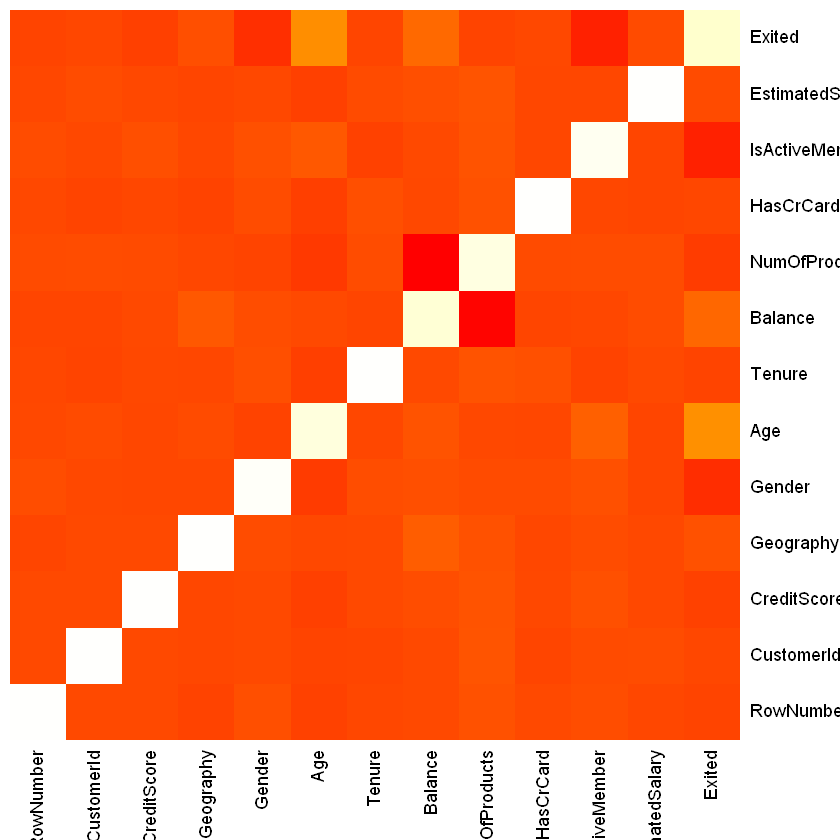

In [17]:
# Calculate the correlation matrix for between variables
numeric_vars <- Bank_exit[, sapply(Bank_exit, is.numeric)]
cor_matrix <- cor(numeric_vars)

# Visualize the correlation matrix using a heatmap
heatmap(cor_matrix, Rowv=NA, Colv=NA, col = heat.colors(256), scale="column", margins=c(5,5))

In [18]:
# Calculate the correlation of all predictors with the target variable('Exited')
correlations <- cor(Bank_exit[, sapply(Bank_exit, is.numeric)])
correlation_with_target <- abs(correlations[,'Exited'])

# Sort features by their correlation with 'Exited'
sorted_features <- sort(correlation_with_target, decreasing = TRUE)

# Display the sorted features
sorted_features

Exited             Age  IsActiveMember         Balance          Gender 
    1.000000000     0.285323038     0.156128278     0.118532769     0.106512488 
  NumOfProducts       Geography     CreditScore       RowNumber          Tenure 
    0.047819865     0.035942955     0.027093540     0.016571371     0.014000612 
EstimatedSalary       HasCrCard      CustomerId 
    0.012096861     0.007137766     0.006247987

In [19]:
print (sorted_features)

         Exited             Age  IsActiveMember         Balance          Gender 
    1.000000000     0.285323038     0.156128278     0.118532769     0.106512488 
  NumOfProducts       Geography     CreditScore       RowNumber          Tenure 
    0.047819865     0.035942955     0.027093540     0.016571371     0.014000612 
EstimatedSalary       HasCrCard      CustomerId 
    0.012096861     0.007137766     0.006247987 


In [20]:
# Check for outliers using the IQR method
# Identify numeric columns
numeric_columns <- sapply(Bank_exit, is.numeric)

# Check for outliers using the IQR method
outliers <- sapply(Bank_exit[numeric_columns], function(x) {
  q75 <- quantile(x, 0.75, na.rm = TRUE)
  q25 <- quantile(x, 0.25, na.rm = TRUE)
  iqr <- q75 - q25
  sum(x < (q25 - 1.5 * iqr) | x > (q75 + 1.5 * iqr))
})
outliers

RowNumber      CustomerId     CreditScore       Geography          Gender 
              0               0              15               0               0 
            Age          Tenure         Balance   NumOfProducts       HasCrCard 
            359               0               0              60               0 
 IsActiveMember EstimatedSalary          Exited 
              0               0            2037

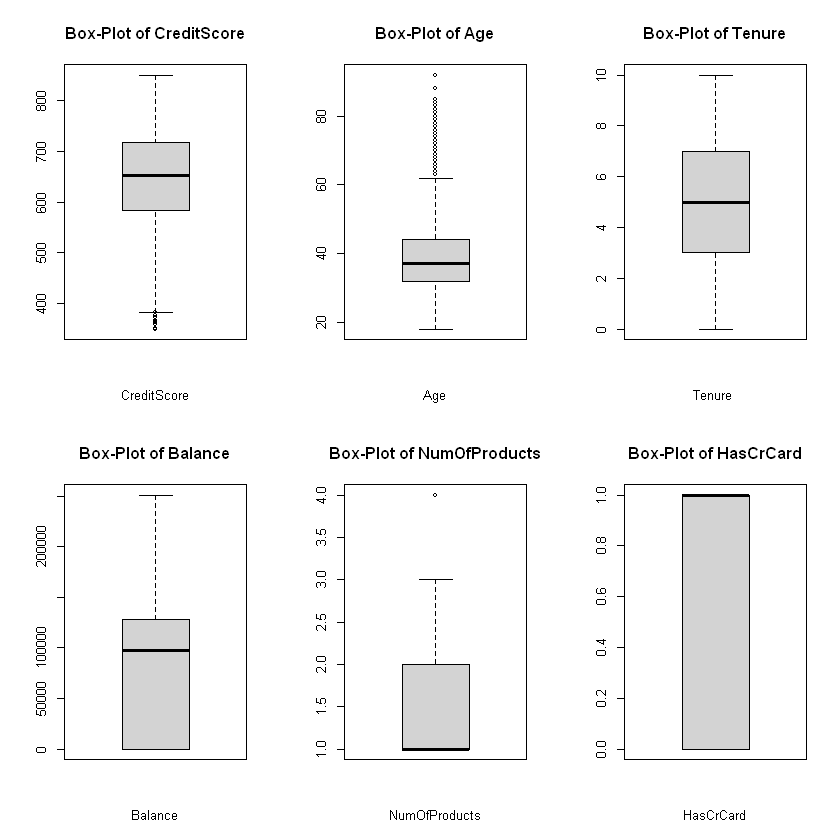

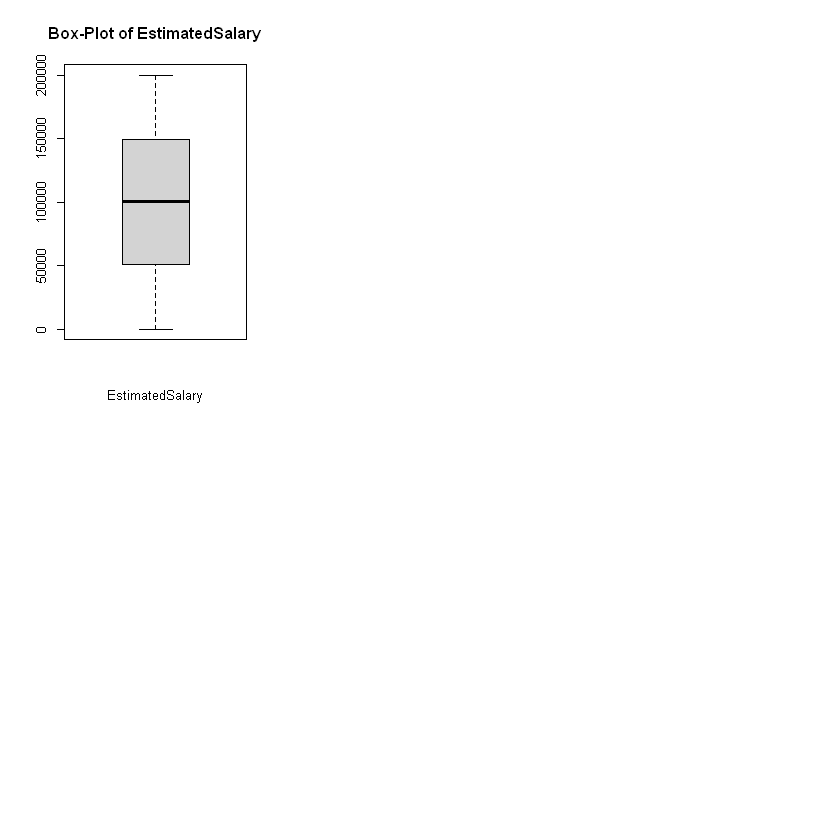

In [21]:
        # BOX PLOT FOR NUMERICAL VARIABLES

par(mfrow=c(2,3)) # Plotting area setup

       # BOX-PLOT
boxplot(Bank_exit$CreditScore, main="Box-Plot of CreditScore", xlab="CreditScore")  # Box-Plot for 'CreditScore'
boxplot(Bank_exit$Age, main="Box-Plot of Age", xlab="Age")  # Box-Plot for 'Age'
boxplot(Bank_exit$Tenure, main="Box-Plot of Tenure", xlab="Tenure ")  # Box-Plot for 'Tenure'
boxplot(Bank_exit$Balance, main="Box-Plot of Balance", xlab="Balance")  # Box-Plot for 'Balance'
boxplot(Bank_exit$NumOfProducts, main="Box-Plot of NumOfProducts", xlab="NumOfProducts")  # Box-Plot for 'NumOfProducts'
boxplot(Bank_exit$HasCrCard , main="Box-Plot of HasCrCard", xlab="HasCrCard")  # Box-Plot for 'HasCrCard'
boxplot(Bank_exit$EstimatedSalary, main="Box-Plot of EstimatedSalary", xlab="EstimatedSalary")  # Box-Plot for 'EstimatedSalary'


Original data dimensions: 9582 14

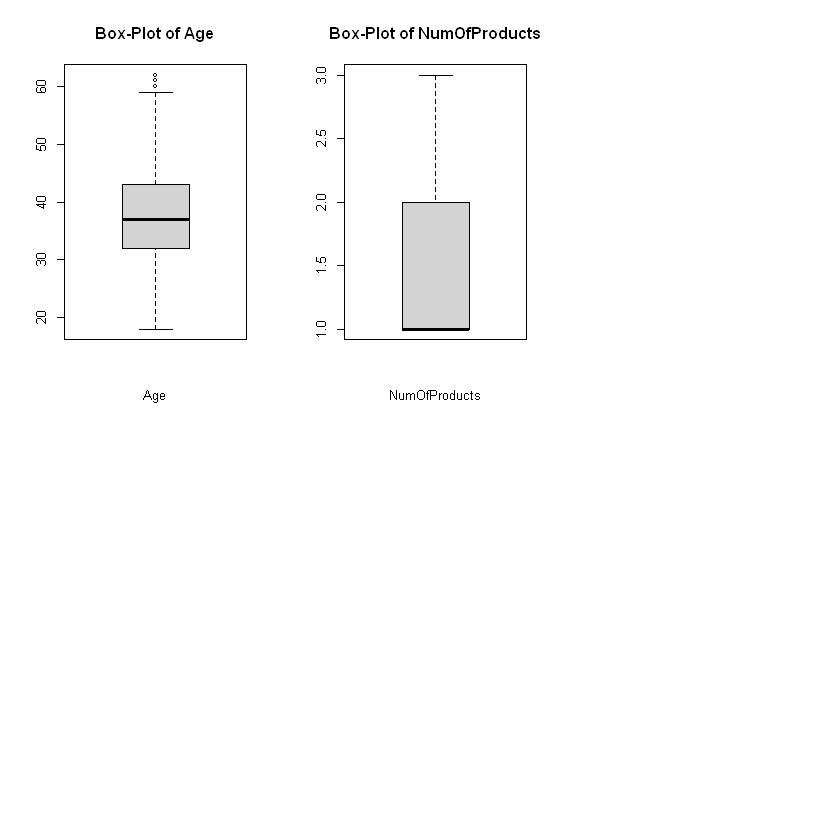

In [22]:
# REMOVE OUTLIERS
 # Function to Remove Outliers
rm_out <- function(df, v) {
  Q1 <- quantile(df[[v]], 0.25, na.rm = TRUE)
  Q3 <- quantile(df[[v]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lb <- Q1 - 1.5 * IQR
  ub <- Q3 + 1.5 * IQR
  df[df[[v]] >= lb & df[[v]] <= ub, ]
}

# Variables list
vars <- c("Age", "NumOfProducts")

# Removing outliers from all specified variables and storing in new dataset
Bank_exit <- Bank_exit
for(v in vars) {
 Bank_exit <- rm_out(Bank_exit, v)
}

# Dimensions of the original and cleaned data frames
cat("Original data dimensions:", dim(Bank_exit))

par(mfrow=c(2,3)) # Plotting area setup

       # BOX-PLOT
boxplot(Bank_exit$Age, main="Box-Plot of Age", xlab="Age")  # Box-Plot for 'Age'
boxplot(Bank_exit$NumOfProducts, main="Box-Plot of NumOfProducts", xlab="NumOfProducts")  # Box-Plot for 'NumOfProducts'


In [23]:
# Summary of the target variable
Exited_summary <- table(Bank_exit$Exited)
Exited_summary


   0    1 
7677 1905 

In [24]:
# Feature Selection
Bank_exit <- Bank_exit %>% select(-RowNumber, -Surname, -CustomerId)

In [25]:
# Data Preprocessing
remove_Exited <- subset(Bank_exit,  select = -c(Exited) )

In [26]:
library(caret)
# Normalize numerical features
preprocessor <- preProcess(remove_Exited, method = c('center', 'scale'))
Bank_exit_final <- predict(preprocessor, remove_Exited)

Loading required package: lattice



In [27]:
summary(Bank_exit_final)

  CreditScore         Geography          Gender             Age          
 Min.   :-3.10633   Min.   :-0.902   Min.   :-1.0992   Min.   :-2.24703  
 1st Qu.:-0.69589   1st Qu.:-0.902   1st Qu.:-1.0992   1st Qu.:-0.65383  
 Median : 0.01793   Median :-0.902   Median : 0.9097   Median :-0.08483  
 Mean   : 0.00000   Mean   : 0.000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.69038   3rd Qu.: 0.306   3rd Qu.: 0.9097   3rd Qu.: 0.59797  
 Max.   : 2.06629   Max.   : 1.514   Max.   : 0.9097   Max.   : 2.76016  
     Tenure             Balance        NumOfProducts       HasCrCard      
 Min.   :-1.735717   Min.   :-1.2247   Min.   :-0.9376   Min.   :-1.5473  
 1st Qu.:-0.697191   1st Qu.:-1.2247   1st Qu.:-0.9376   1st Qu.:-1.5473  
 Median :-0.004841   Median : 0.3311   Median :-0.9376   Median : 0.6462  
 Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.687509   3rd Qu.: 0.8201   3rd Qu.: 0.8803   3rd Qu.: 0.6462  
 Max.   : 1.726034   Max.   : 2.

In [28]:
Bank_exit_final$Exited<- Bank_exit$Exited

In [29]:
Bank_exit_summary <- table(Bank_exit_final$Exited)
Bank_exit_summary


   0    1 
7677 1905 

In [30]:
head(Bank_exit_final)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.32345902,-0.9019853,-1.0991892,0.4841654,-1.043366,-1.2246773,-0.9376027,0.6462366,0.9932911,0.02081598,1
2,-0.43725674,1.5138982,-1.0991892,0.3703657,-1.389542,0.1179531,-0.9376027,-1.5472594,0.9932911,0.21543388,0
3,-1.53385295,-0.9019853,-1.0991892,0.4841654,1.033684,1.3331429,2.6982165,0.6462366,-1.0066491,0.23958338,1
4,0.50416076,-0.9019853,-1.0991892,0.1427663,-1.389542,-1.2246773,0.8803069,-1.5472594,-1.0066491,-0.10996870,0
5,2.06629309,1.5138982,-1.0991892,0.5979651,-1.043366,0.7860486,-0.9376027,0.6462366,0.9932911,-0.36628790,0
6,-0.05448259,1.5138982,0.9096666,0.7117648,1.033684,0.5977289,0.8803069,0.6462366,-1.0066491,0.86245281,1


**DATA SPLITTING**

In [31]:
# Split the data into training and testing sets
set.seed(256)
trainIndex <- createDataPartition(Bank_exit_final$Exited, p = .7, list = FALSE, times = 1) 
training_data <- Bank_exit_final[trainIndex, ]
testing_data <- Bank_exit_final[-trainIndex, ]

list(training_data = dim(training_data), testing_data = dim(testing_data))

$training_data
[1] 6708   11

$testing_data
[1] 2874   11

In [32]:
train_summary <- table(training_data$Exited)
train_summary


   0    1 
5393 1315 

In [33]:
colnames(training_data)

[1] "CreditScore"     "Geography"       "Gender"          "Age"            
 [5] "Tenure"          "Balance"         "NumOfProducts"   "HasCrCard"      
 [9] "IsActiveMember"  "EstimatedSalary" "Exited"

**MODEL BUILDING**

In [34]:
# Ensure 'Exited' is a factor with two levels: 0 and 1
training_data$Exited <- factor(training_data$Exited, levels = c(0, 1))

In [35]:
# Decision Tree
# Load necessary library
library(caret)

# Set up training control
train_control <- trainControl(method = "cv", number = 10)

# Train the model
dt_model <- train(Exited ~ ., data = training_data, method = "rpart",
                  trControl = train_control)

dt_model

CART 

6708 samples
  10 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6037, 6036, 6037, 6037, 6037, 6038, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02357414  0.8415347  0.3819996
  0.03041825  0.8327376  0.3560093
  0.07072243  0.8135037  0.1483438

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02357414.

In [36]:
#The KNN model
library(caret)
# Set up training control for cross-validation
train_control <- trainControl(method = "cv", number = 10)

# I used k=101 because there are 10,000 rows using the square root rule it would be 100rows but to make it odd I used 101

# Train the KNN model using the chosen k
knn_model <- train(
  Exited ~ .,
  data = training_data,
  method = "knn",
  trControl = train_control,
  tuneGrid = expand.grid(k = 101)
)

# Print the model details
print(knn_model)

k-Nearest Neighbors 

6708 samples
  10 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6038, 6037, 6037, 6037, 6038, 6037, ... 
Resampling results:

  Accuracy   Kappa    
  0.8248357  0.1840844

Tuning parameter 'k' was held constant at a value of 101


**MODEL EVALUATION**

In [37]:
# Convert 'phishing' variable in testing_data to a factor with two levels
testing_data$Exited <- factor(testing_data$Exited, levels = c(0, 1))

In [38]:
# Evaluate Decision Tree

# Predict on testing data
dt_predictions <- predict(dt_model, newdata = testing_data)

# Evaluate the model
dt_results <- confusionMatrix(dt_predictions, testing_data$Exited)

In [39]:
# Print Decision tree metrics
print(dt_results)
print(paste("Accuracy:", dt_results$overall['Accuracy']))
print(paste("Precision:", dt_results$byClass['Precision']))
print(paste("Recall:", dt_results$byClass['Recall']))
print(paste("F1 Score:", dt_results$byClass['F1']))


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2198  361
         1   86  229
                                          
               Accuracy : 0.8445          
                 95% CI : (0.8307, 0.8575)
    No Information Rate : 0.7947          
    P-Value [Acc > NIR] : 5.27e-12        
                                          
                  Kappa : 0.4237          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9623          
            Specificity : 0.3881          
         Pos Pred Value : 0.8589          
         Neg Pred Value : 0.7270          
             Prevalence : 0.7947          
         Detection Rate : 0.7648          
   Detection Prevalence : 0.8904          
      Balanced Accuracy : 0.6752          
                                          
       'Positive' Class : 0               
                        

[1] "Accuracy: 0.84446764091858"
[1] "Precision: 0.858929269245799"
[1] "Recall: 0.962346760070052"
[1] "F1 Score: 0.907701837703903"


In [40]:
# Ensure 'Exited' variable in testing_data to a factor with two levels
testing_data$Exited <- factor(testing_data$Exited, levels = c(0, 1))

# Predict the Exited outcome using the trained KNN model
predicted_values <- predict(knn_model, newdata = testing_data)

# Evaluate the model's performance
confusion_matrix <- confusionMatrix(predicted_values, testing_data$Exited)

# Output the confusion matrix
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2275  520
         1    9   70
                                        
               Accuracy : 0.8159        
                 95% CI : (0.8013, 0.83)
    No Information Rate : 0.7947        
    P-Value [Acc > NIR] : 0.002352      
                                        
                  Kappa : 0.169         
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9961        
            Specificity : 0.1186        
         Pos Pred Value : 0.8140        
         Neg Pred Value : 0.8861        
             Prevalence : 0.7947        
         Detection Rate : 0.7916        
   Detection Prevalence : 0.9725        
      Balanced Accuracy : 0.5574        
                                        
       'Positive' Class : 0             
                                        


In [41]:
# Print KNN metrics
print(confusion_matrix)
print(paste("Accuracy:", confusion_matrix$overall['Accuracy']))
print(paste("Precision:", confusion_matrix$byClass['Precision']))
print(paste("Recall:", confusion_matrix$byClass['Recall']))
print(paste("F1 Score:", confusion_matrix$byClass['F1']))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2275  520
         1    9   70
                                        
               Accuracy : 0.8159        
                 95% CI : (0.8013, 0.83)
    No Information Rate : 0.7947        
    P-Value [Acc > NIR] : 0.002352      
                                        
                  Kappa : 0.169         
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9961        
            Specificity : 0.1186        
         Pos Pred Value : 0.8140        
         Neg Pred Value : 0.8861        
             Prevalence : 0.7947        
         Detection Rate : 0.7916        
   Detection Prevalence : 0.9725        
      Balanced Accuracy : 0.5574        
                                        
       'Positive' Class : 0             
                                        


[1] "Accuracy: 0.815935977731385"
[1] "Precision: 0.813953488372093"
[1] "Recall: 0.996059544658494"
[1] "F1 Score: 0.895845638905296"
